# Logistic Regression Henry

$(Y_n, \Phi_n)$ suite de variable aléatoire à valeurs dans $\{0,1\} \times \mathbb{R}^d$, indépendantes et equidistribuées, telles que pour tout $n \geq 1$ la loi conditionnelle de $Y_n$ sachant $\Phi_n$ est une loi de Bernouilli : <br>
$$
\mathcal{L}(Y_n | \Phi_n) = \mathcal{B}(\pi(\theta^T \Phi_n)) \quad avec \quad \pi(x) = \frac{\exp(x)}{1 + \exp(x)}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def pi_func(x):
    return np.exp(x)/(1+np.exp(x))

def sample(d, n, m, theta, means=None, covar=None):
    # d : size of phi 
    # n : number of steps in each simulation
    # m : number of simulations 
    if means == None:
        means = np.zeros(d)
    if covar == None:
        covar = np.identity(d)
    if m == 1:
        phi = np.random.multivariate_normal(means, covar, n) # Shape (n, d)
    else:
        phi = np.random.multivariate_normal(means, covar, (n, m)) # Shape (n, m, d)
    pi_phi = pi_func(phi@theta) # Shape (n, m) with pi_phi[i,j] = pi(theta.T phi[i,j])
    y = np.random.binomial(1, pi_phi) # Shape (n, m)
    return [phi, pi_phi, y]


def newton(n, d, phi, y, beta, c):
    a  = np.zeros(n+1)
    theta = np.zeros((n+1, d))
    theta[0] = np.random.normal(0, 1, d)
    s = np.zeros((n+1, d, d))
    s[0] = np.identity(d)
    for i in range(1, n+1):
        p = pi_func(np.sum(theta[i-1]*phi[i-1]))
        a[i] = p*(1 - p)
        theta[i] = theta[i-1] + (y[i-1] - p)*s[i-1]@phi[i-1]
        a_real = np.max([a[i], c/(n**beta)])
        s_1 = (s[i-1]@phi[i-1]).reshape(-1, 1)
        s_2 = (phi[i-1]@s[i-1]).reshape(1, -1)
        s[i] = s[i-1] - (a_real/(1 + a_real*(phi[i-1]@s[i-1]@phi[i-1])))*(s_1@s_2)
    return theta

In [ ]:
d = 3
n = 1000
m = 1
theta = np.array([1.5, -1, 2.7])
res = sample(d, n, m, theta)

In [ ]:
c = 10e-10
beta = 0.49
theta_n = newton(n, d, res[0], res[2], beta, c)

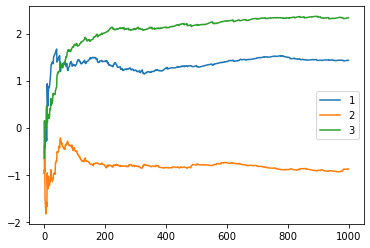

In [ ]:
plt.plot(theta_n[:, 0], label="1")
plt.plot(theta_n[:, 1], label="2")
plt.plot(theta_n[:, 2], label="3")
plt.legend()
plt.show()

# Find index of target in semi-sorted array

In [2]:
def find_k(nums):
    # Find index of change : returned k is index of min value. Previous is max
    n = len(nums)
    left = 0
    right = n-1
    while left < right:
        mid = (left + right)//2
        if nums[mid] > nums[right]:
            left = mid +1
        else:
            right = mid 
    return left 

def find_target(nums, k, target):
    n = len(nums)
    # shift pos = (true - k)%n
    left = 0
    right = n - 1
    if target == nums[k-1]:
        return (k - 1)%n
    while left < right:
        mid = (left+right)//2
        shift_mid = (mid + k)%n
        if target > nums[shift_mid]:
            left = mid + 1
        elif target < nums[shift_mid]:
            right = mid
        else:
            return shift_mid
        
    return -1

In [3]:
a = [4,5,6,7,0,1,2]

In [11]:
k = find_k(a)
print(k)
for i in range(8):
    print(i, " : " ,find_target(a, k, i))

4
0  :  4
1  :  5
2  :  6
3  :  -1
4  :  0
5  :  1
6  :  2
7  :  3
